# This colab contains the basic pre-procesing of the Lession - Behaviour Mapping analysis on the PNT dataset.  

In [ ]:
from google.colab import drive
drive.mount("/Jash")

Drive already mounted at /Jash; to attempt to forcibly remount, call drive.mount("/Jash", force_remount=True).


Importing required libraries

In [ ]:
import os           # For getting file paths
import numpy as np   # For matrix manipulations
import pandas as pd   # For xlxs files and data structure
import scipy.io as io  # For loading .mat files
import seaborn as sns   # For visualization of plots
import matplotlib.pyplot as plt # For visualizing dataframe plots
import cv2                  # Computer vision library
import random             # For getting Random numbers
from matplotlib import cm

In [ ]:
path_to_data = "/Jash/My Drive/VLSM/"
ldseg=np.array(os.listdir(path_to_data))

## Preprocessing -1 : Creating seperate variables for data and labels.

In [ ]:
x = []
x_temp = []

for filename in ldseg:
  if ( filename.split('.')[-1] == 'mat'):
    x.append(filename)
    x_temp.append((filename.split('.')[0])[1:])
  elif (filename.split('.')[-1] == 'xlsx'):
    df = pd.read_excel(path_to_data + filename).iloc[:,0:2]

x_temp = np.asarray(x_temp)
x_temp = x_temp.astype(np.int64)

print(df.head())
print("\n")
print(df.info)

   Subject  BL_Mean_Correct
0    10011            130.5
1    10021            165.0
2    10031              1.0
3    10041             56.5
4    10051             25.0


<bound method DataFrame.info of      Subject  BL_Mean_Correct
0      10011            130.5
1      10021            165.0
2      10031              1.0
3      10041             56.5
4      10051             25.0
..       ...              ...
122    11231            165.5
123    11241            158.0
124    11251            169.0
125    11261            164.0
126    11271            171.0

[127 rows x 2 columns]>


In [ ]:
# We remove the redundant rows by comparing the file names.

df = df.loc[df['Subject'].isin(x_temp)]
df.info

<bound method DataFrame.info of      Subject  BL_Mean_Correct
0      10011            130.5
1      10021            165.0
2      10031              1.0
3      10041             56.5
4      10051             25.0
..       ...              ...
111    11121             59.5
112    11131            164.0
114    11151            117.5
118    11191            157.0
120    11211            162.5

[111 rows x 2 columns]>

In [ ]:
# Now we remove the rows, that do not have acceptable values
df.dropna(inplace=True)
df.info

<bound method DataFrame.info of      Subject  BL_Mean_Correct
0      10011            130.5
1      10021            165.0
2      10031              1.0
3      10041             56.5
4      10051             25.0
..       ...              ...
111    11121             59.5
112    11131            164.0
114    11151            117.5
118    11191            157.0
120    11211            162.5

[109 rows x 2 columns]>

In [ ]:
# Removing the files that do not have lesion data in them

for name in df['Subject']:
  random_img = io.loadmat(path_to_data+str('M')+str(name))
  flag = 0
  for i in random_img:
    if (i == 'lesion'):
      flag = 1
  if (flag == 0):
    df.drop(df.loc[df['Subject']==name].index, inplace=True) 

df.info

<bound method DataFrame.info of      Subject  BL_Mean_Correct
0      10011            130.5
1      10021            165.0
2      10031              1.0
3      10041             56.5
4      10051             25.0
..       ...              ...
111    11121             59.5
112    11131            164.0
114    11151            117.5
118    11191            157.0
120    11211            162.5

[108 rows x 2 columns]>

## Preprocessing 2 - Converting the Mean to labels and analysing the distribution.

In [ ]:
y_temp = []
for index, row in df.iterrows() :
    y_temp.append(row['BL_Mean_Correct'])

y_temp = np.array(y_temp)

In [ ]:
num_of_classes = int(input("Enter the number of classes you wish to have : \n"))

ranges = [ ( min(y_temp) + ( i*( max(y_temp) - min(y_temp) )/num_of_classes ) ) for i in range(1,num_of_classes)]
print(ranges)

# Labelling the classes
for num,i in enumerate(y_temp):
  for j in range(len(ranges)):
    if (i < ranges[0]):
      y_temp[num] = int(0)
    elif (i >= ranges[-1]):
      y_temp[num] = int(len(ranges))
    elif ( i >= ranges[j] and i < ranges[j+1]):
      y_temp[num] = int(j+1)

df.insert(2, "Labels", y_temp, True)

Enter the number of classes you wish to have : 
2
[86.5]


In [ ]:
del x_temp
del y_temp
df.head()

,Subject,BL_Mean_Correct,Labels
0,10011,130.5,1.0
1,10021,165.0,1.0
2,10031,1.0,0.0
3,10041,56.5,0.0
4,10051,25.0,0.0


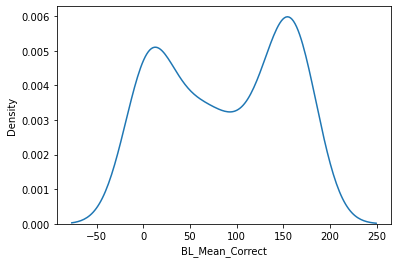

In [ ]:
import seaborn as sns
sns.kdeplot(data = df, x="BL_Mean_Correct")

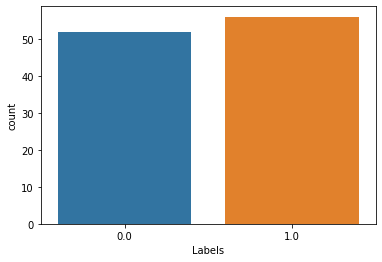

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='Labels', data = df)
 
# Show the plot
plt.show()

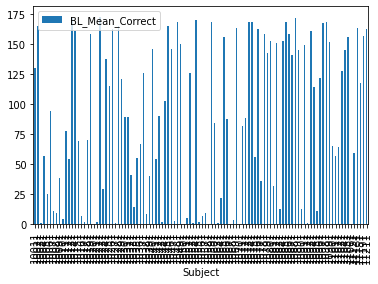

In [ ]:
df.plot.bar(x='Subject', y='BL_Mean_Correct', legend = True)

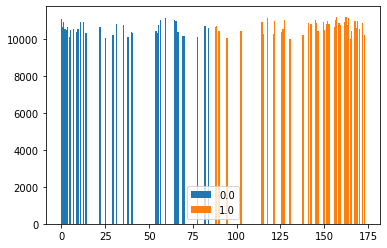

In [ ]:
groups = df.groupby("Labels")
for name, group in groups:
    plt.bar(group["BL_Mean_Correct"], group["Subject"], label=name)
plt.legend()

## Preprocessing -3 - Loading the mat files and viewing the images in different 3-D reconstructed format.

---
Nifti is a medical images format, to store both images, and companied data, the images are usually in grayscale, and they are taken as slices, each slice with a different cross-section of the body.

They store all the slices in the same array, and sometimes they take the slices during different times so sometimes they add a fourth dimension to the array.

So to show the images, or manipulate them, you can slice them and see the images inside. 

---

  * If the data is 3-D, it is of the format (w,h,slices)
  * In dace it is 4-D, the last dimmension is for time


In [ ]:
random_num = random.randint(0,109)
pic = x[random_num]
Random_image = io.loadmat(path_to_data+pic)
print(pic)
lession = Random_image['lesion']
print("Printing the info : \n", lession)

M10701.mat
Printing the info : 
 [[(array([[(array(['/media/research/POLAREXP/POLAR_Master_In/M10701/wsrLesion_M10701_POLAR.nii'],
      dtype='<U74'), array([[157, 189, 156]], dtype=uint8), array([[2, 0]], dtype=uint8), array([[  1],
       [  0],
       [352]], dtype=uint16), array([[  -1,    0,    0,   79],
       [   0,    1,    0, -113],
       [   0,    0,    1,  -71],
       [   0,    0,    0,    1]], dtype=int16), array([[1, 1]], dtype=uint8), array(['Warped'], dtype='<U6'), MatlabObject([[(array([[(array([[348]], dtype=int32), array([''], dtype='<U10'), array([''], dtype='<U18'), array([[0]], dtype=int32), array([[0]], dtype=int16), array(['r'], dtype='<U1'), array([[0]], dtype=uint8), array([[  3, 157, 189, 156,   1,   1,   1,   1]], dtype=int16), array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[0]], dtype=int16), array([[2]], dtype=int16), array([[8]], dtype=int16), array([[0]], dtype=int16), array([[-1. ,  1. ,  1. ,  1. ,  3

In [ ]:
print("This is the data of subject : ", random_num)
data = lession[0][0][1]
data = 255*data       # Binary Thresholding - for converting the pixel value of 1 to 255
print(data.shape)
print("Total number of voxels = ", data.shape[0]*data.shape[1]*data.shape[2])

This is the data of subject :  73
(157, 189, 156)
Total number of voxels =  4628988


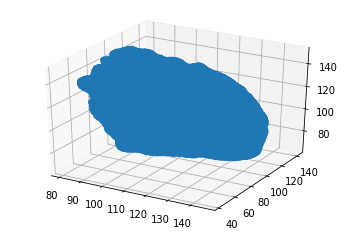

In [ ]:
#@title Viewing the Native Point Cloud Data

ax = plt.axes(projection='3d')
x, y, z = data.nonzero()
ax.scatter(x, y, z, alpha=1)
plt.show()

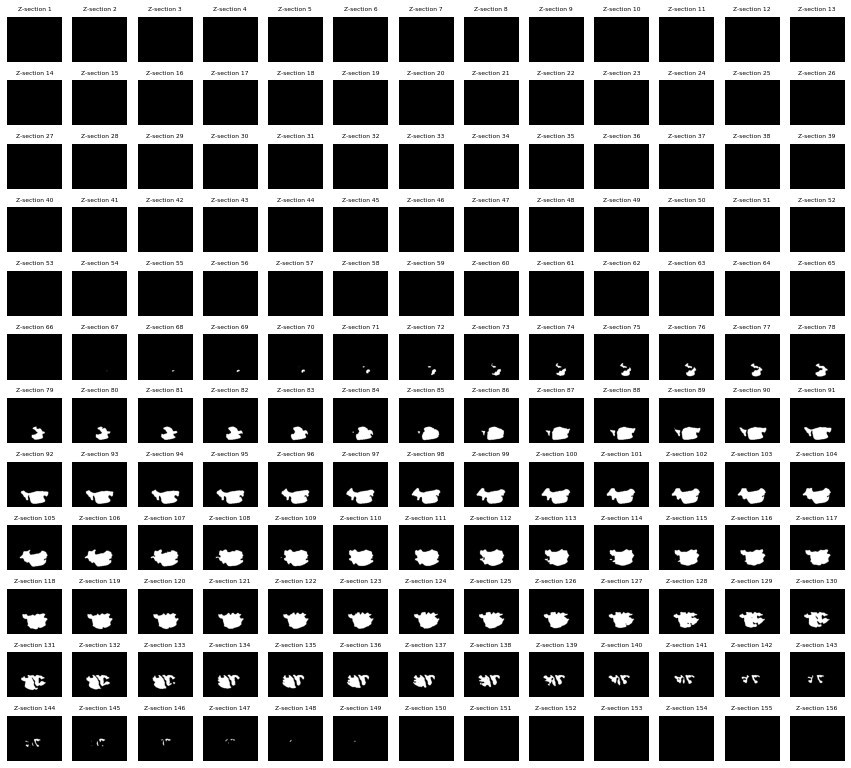

In [ ]:
#@title Viewing the Sliced Data -  Across the z-axis i.e. top to bottom.

from matplotlib import pyplot as plt
%matplotlib inline

# create figure
fig = plt.figure(figsize=(15, 15))

rows = 13
cols = 13

for i in range(1, data.shape[-1] + 1):
  fig.add_subplot(rows, cols, i)
  plt.imshow(data[:,:,i-1], cmap='gray')
  plt.title("Z-section {}".format(i), fontsize = 6)
  plt.axis('off')

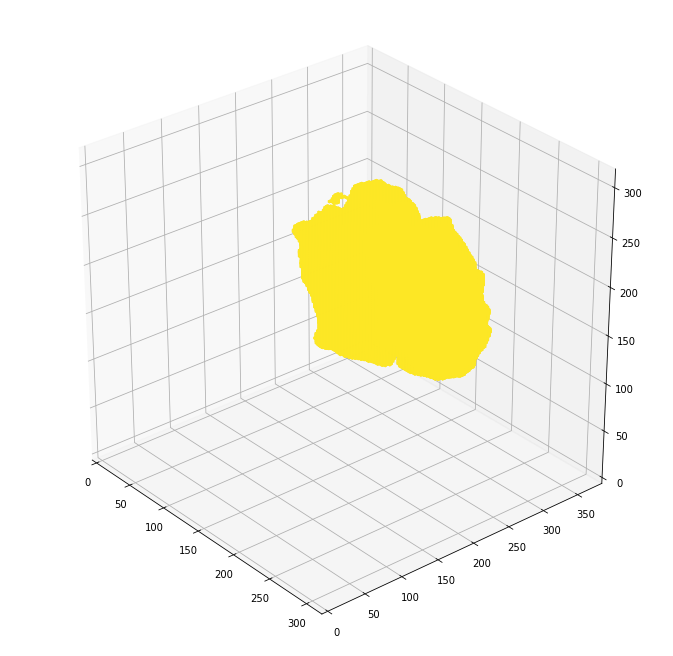

In [ ]:
#@title Viewing the 3-D Voxelization

def normalize(arr):
    arr_min = np.min(arr)
    return (arr-arr_min)/(np.max(arr)-arr_min)

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

def plot_cube(cube, angle=320):
    cube = normalize(cube)
    
    facecolors = cm.viridis(cube)
    facecolors[:,:,:,-1] = cube
    facecolors = explode(facecolors)
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=cube.shape[0]*2)
    ax.set_ylim(top=cube.shape[1]*2)
    ax.set_zlim(top=cube.shape[2]*2)
    
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)
    plt.show()

plot_cube(data)

Train-test split using statified information

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,stratify=df['Labels'])
print("Train df : ", train.describe(), "\n Test df : ",test.describe())

Train df :              Subject  BL_Mean_Correct     Labels
count     86.000000        86.000000  86.000000
mean   10576.465116        90.767442   0.523256
std      322.933819        65.838738   0.502388
min    10011.000000         0.000000   0.000000
25%    10296.000000        16.000000   0.000000
50%    10576.000000        89.000000   1.000000
75%    10848.500000       158.125000   1.000000
max    11211.000000       173.000000   1.000000 
 Test df :              Subject  BL_Mean_Correct     Labels
count     22.000000        22.000000  22.000000
mean   10521.454545        75.500000   0.500000
std      366.625244        62.251984   0.511766
min    10031.000000         0.000000   0.000000
25%    10216.000000         9.500000   0.000000
50%    10431.000000        79.250000   0.500000
75%    10816.000000       141.500000   1.000000
max    11151.000000       164.000000   1.000000


## Pre-processing - 4 : Data Augmentation and saving the modified dataset.

In [ ]:
import random
from scipy import ndimage

def rotate(volume):
    """Rotate the volume by a few degrees"""
    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = scipy_rotate(volume)
    return augmented_volume

def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = img.shape[-1]//3
    desired_width = img.shape[0]//3
    desired_height = img.shape[1]//3
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor))
    return img

In [ ]:
path_to_storage = '/Jash/My Drive/VLSM/Modified_data/'
path_to_train = path_to_storage + 'train/'
path_to_test = path_to_storage + 'test/'

temp = np.array(os.listdir(path_to_storage))
if (len(temp) == 0):
  os.mkdir(path_to_train)
  os.mkdir(path_to_test)
  print("Built new folders")

elif (i == 'train' or i == 'test' for i in temp):
  !rm -rf '/Jash/My Drive/VLSM/Modified_data/train'
  !rm -rf '/Jash/My Drive/VLSM/Modified_data/test'
  os.mkdir(path_to_storage + 'train/')
  os.mkdir(path_to_storage + 'test/')
  print("Cleared the existing folders")

else:
  !rm -rf '/Jash/My Drive/VLSM/Modified_data'
  os.mkdir(path_to_storage)
  os.mkdir(path_to_storage + 'train/')
  os.mkdir(path_to_storage + 'test/')
  print("Error occured!!!")

Built new folders


In [ ]:
#@title For Classification - train
file_name = np.array(train['Subject'].values)
x_train = []
y_train = np.array(train['Labels'].values)

for name in train['Subject'].values:
  random_img = io.loadmat(path_to_data+str('M')+str(name))
  lession = random_img['lesion']
  data = lession[0][0][1]*255
  data = np.array(data)
  #data = rotate(data)
  data = resize_volume(data)
  x_train.append(data)

x_train = np.array(x_train)

## Saving
from numpy import save
save(path_to_train+'file_names.npy', file_name)
save(path_to_train+'x_train.npy', x_train)
save(path_to_train+'y_train.npy', y_train)

In [ ]:
#@title For Regression - train
file_name = np.array(train['Subject'].values)
x_train = []
y_train = np.array(train['BL_Mean_Correct'].values)

for name in train['Subject'].values:
  random_img = io.loadmat(path_to_data+str('M')+str(name))
  lession = random_img['lesion']
  data = lession[0][0][1]*255
  data = np.array(data)
  #data = rotate(data)
  data = resize_volume(data)
  x_train.append(data)

x_train = np.array(x_train)

## Saving
from numpy import save
save(path_to_train+'file_names.npy', file_name)
save(path_to_train+'x_train.npy', x_train)
save(path_to_train+'y_train.npy', y_train)

In [ ]:
#@title For CLassification - test
file_name = np.array(test['Subject'].values)
x_test = []
y_test = np.array(test['Labels'].values)

for name in test['Subject'].values:
  random_img = io.loadmat(path_to_data+str('M')+str(name))
  lession = random_img['lesion']
  data = lession[0][0][1]*255
  data = np.array(data)
  #data = rotate(data)
  data = resize_volume(data)
  x_test.append(data)

x_test = np.array(x_test)

## Saving
from numpy import save
save(path_to_test+'file_names.npy', file_name)
save(path_to_test+'x_test.npy', x_test)
save(path_to_test+'y_test.npy', y_test)

In [ ]:
#@title For Regression - test
file_name = np.array(test['Subject'].values)
x_test = []
y_test = np.array(test['BL_Mean_Correct'].values)

for name in test['Subject'].values:
  random_img = io.loadmat(path_to_data+str('M')+str(name))
  lession = random_img['lesion']
  data = lession[0][0][1]*255
  data = np.array(data)
  #data = rotate(data)
  data = resize_volume(data)
  x_test.append(data)

x_test = np.array(x_test)

## Saving
from numpy import save
save(path_to_test+'file_names.npy', file_name)
save(path_to_test+'x_test.npy', x_test)
save(path_to_test+'y_test.npy', y_test)